Add the (5.2n) shortest edges
- Will this create a connected graph?

In [98]:
import math
import random 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [99]:
n = 50 # number of nodes I want in graph
rand_seed = 13 # 13, 47, 50

In [100]:
random.seed(rand_seed) # Must be in the same code chunk as when I am doing the randomness

G = nx.Graph()
x_axis = {}
y_axis = {}
for i in range(0, n):
    x_axis[i] = round(random.random(), 3)
    y_axis[i] = round(random.random(), 3)
    G.add_node(i)

nx.set_node_attributes(G, x_axis, name='x_axis')
nx.set_node_attributes(G, y_axis, name='y_axis')

In [101]:
# Create a dictionary of all distances between points
dist_df = pd.DataFrame(columns = ['node1', 'node2', 'distance'])

for i in range(0, n): # Go from 0 to n-1
    for j in range(i+1, n): # Go from i+1 to n-1
        u = (G.nodes()[i]['x_axis'], G.nodes()[i]['y_axis'])
        v = (G.nodes()[j]['x_axis'], G.nodes()[j]['y_axis'])

        # Find distance between points
        distance = math.dist(u, v)

        # Add it to the dataframe
        dist_df.loc[len(dist_df)] = [i, j, distance]

In [102]:
# Add the (5.2n) shortest edges
edges = int(5.2 * n)
dist_sorted = dist_df.sort_values("distance").head(edges)

for index, row in dist_sorted.iterrows():
    i = row['node1']
    j = row['node2']
    G.add_edge(i, j)

In [103]:
# Calculate average degree
def avg_degree(G): # Calculation taken from Prof Cannon's research
    # Function calculate average degree from graph (added by Joy)
    return 2 * G.number_of_edges() / G.number_of_nodes()

avg_degree(G)

10.4

In [104]:
# Create a dictionary of node positions
node_locations = {v: (float(G.nodes()[v]['x_axis']), float(G.nodes()[v]['y_axis'])) for v in G.nodes()}

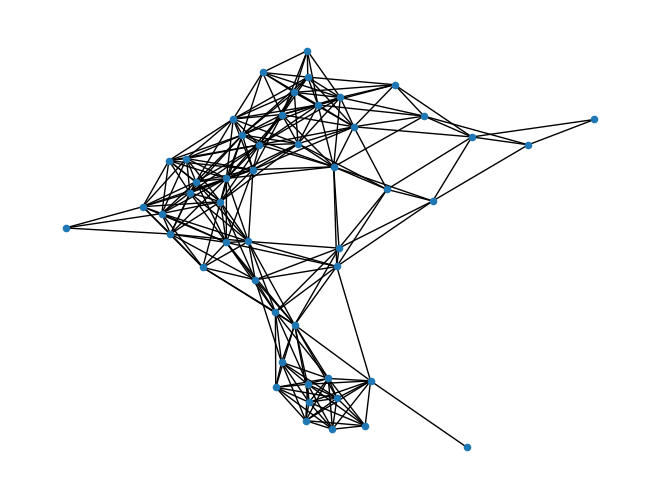

In [105]:
# Drawing a figure with these locations
nx.draw(G, node_size = 20)
plt.savefig(f'/Users/annef/Coding_Data_Projects/Thesis/senior-thesis/imgs/model_two/{n}-{rand_seed}.png')